<a href="https://colab.research.google.com/github/ZER-0-NE/OrcaCNN-Demo/blob/master/OrcaCNN_PreProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authenticate Google Cloud with Google Colab for the current user

In [0]:
from google.colab import auth
auth.authenticate_user()

In [2]:
!gsutil ls -L -b gs://ngos-gsoc-axiom/

gs://ngos-gsoc-axiom/ :
	Storage class:			MULTI_REGIONAL
	Location constraint:		US
	Versioning enabled:		None
	Logging configuration:		None
	Website configuration:		None
	CORS configuration: 		None
	Lifecycle configuration:	None
	Requester Pays enabled:		None
	Labels:				None
	Default KMS key:		None
	Time created:			Wed, 29 May 2019 23:56:21 GMT
	Time updated:			Wed, 29 May 2019 23:56:21 GMT
	Metageneration:			1
	Bucket Policy Only enabled:	True
	ACL:				[]
	Default ACL:			[]


This step downloads/copy all the data from the Google Cloud bucket to Colab for Pre-Processing

In [3]:
!gsutil -m cp -R gs://ngos-gsoc-axiom/Field\ Recordings\ NGOS .

Copying gs://ngos-gsoc-axiom/Field Recordings NGOS/2005 field acoustic recordings/20050508_Natoa_Enc1_AD5AK_2.WAV...
Copying gs://ngos-gsoc-axiom/Field Recordings NGOS/2005 field acoustic recordings/20050508_Natoa_Enc1_AD5AK_1.WAV...
Copying gs://ngos-gsoc-axiom/Field Recordings NGOS/2005 field acoustic recordings/20050508_Natoa_Enc1_AD5AK_3.WAV...
Copying gs://ngos-gsoc-axiom/Field Recordings NGOS/2005 field acoustic recordings/20050516_Natoa_Enc1_AD5feeding.WAV...
Copying gs://ngos-gsoc-axiom/Field Recordings NGOS/2005 field acoustic recordings/20050510_Natoa_WhalesinFog.WAV...
Copying gs://ngos-gsoc-axiom/Field Recordings NGOS/2005 field acoustic recordings/20050517_Natoa_Enc1_Offshore_pt2.WAV...
Copying gs://ngos-gsoc-axiom/Field Recordings NGOS/2005 field acoustic recordings/20050517_Natoa_Enc1_Offshore_pt1.WAV...
Copying gs://ngos-gsoc-axiom/Field Recordings NGOS/2005 field acoustic recordings/20050625 AT109.WAV...
Copying gs://ngos-gsoc-axiom/Field Recordings NGOS/2005 field aco

In [0]:
!mkdir A AB AE AF AK AG AJ AY AS AD AN AX E KF KW PWS 

In [5]:
!ls

 A    adc.json	 AG   AN   AY			    KF	  sample_data
 AB   AE	 AJ   AS   E			    KW
 AD   AF	 AK   AX  'Field Recordings NGOS'   PWS


In [0]:
# !rm -rf A AB AE AF AK AG AJ AY AS AD AN AX E KF KW PWS 

In [0]:
import os
import shutil

file_path = 'Field Recordings NGOS'

for dirs, subdirs, files in os.walk(file_path):
  for file in files:
      if file.endswith(('.wav', '.WAV')):
        f_name = os.path.join(dirs, file)
        if 'AI' in file or 'AI' in dirs:
          shutil.copy(f_name, 'A')
        if 'AB' in file or 'AB' in dirs:
          shutil.copy(f_name, 'AB')
        if 'AD' in file or 'AD' in dirs:
          shutil.copy(f_name, 'AD')
        if 'AE' in file or 'AE' in dirs:
          shutil.copy(f_name, 'AE')
        if 'AF' in file or 'AF' in dirs:
          shutil.copy(f_name, 'AF')
        if 'AG' in file or 'AG' in dirs:
          shutil.copy(f_name, 'AG')
        if 'AJ' in file or 'AJ' in dirs:
          shutil.copy(f_name, 'AJ')
        if 'AK' in file or 'AK' in dirs:
          shutil.copy(f_name, 'AK')
        if 'AN' in file or 'AN' in dirs:
          shutil.copy(f_name, 'AN')
        if 'AS' in file or 'AS' in dirs:
          shutil.copy(f_name, 'AS')
        if 'AX' in file or 'AX' in dirs:
          shutil.copy(f_name, 'AX')
        if 'AY' in file or 'AY' in dirs:
          shutil.copy(f_name, 'AY')
        if 'E01' in file or 'E01' in dirs or 'E02' in file or 'E02' in dirs or 'E03' in file or 'E03' in dirs or 'E04' in file or 'E04' in dirs:
          shutil.copy(f_name, 'E')
        if 'KF' in file or 'KF' in dirs:
          shutil.copy(f_name, 'KF')
        if 'KW' in file or 'KW' in dirs:
          shutil.copy(f_name, 'KW')
        if 'PWS' in file or 'PWS' in dirs:
          shutil.copy(f_name, 'PWS')


In [0]:
# Number of folders in the directory
!ls 'Field Recordings NGOS' | wc -l

14


In [13]:
!pip3 install pydub
from pydub import AudioSegment
import numpy as np

import os
import shutil

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

from scipy.io import wavfile
import wave
import glob
import csv
import pylab
import librosa
import librosa.display
import numpy as np
import scipy
from skimage.restoration import (denoise_wavelet, estimate_sigma)

%matplotlib inline
matplotlib.style.use('ggplot')
import logging

logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

plt.rcParams.update({'figure.max_open_warning': 0})

In [0]:
!ls

 adc.json  'Field Recordings NGOS'   sample_data


Sample run on a random file and visualization of data

In [14]:
fname = 'Field Recordings NGOS/2014 field acoustic recordings/2014-05-28 AY,AK,AD11.wav'
data, sr =librosa.core.load(fname, sr=44100, res_type='kaiser_fast')
print("Sampling (frame) rate = ", sr)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  44100
Total samples (frames) =  (928217,)
[ 5.5521565e-09 -9.6601678e-09  4.2251704e-09 ... -1.2764791e-05
 -1.7789399e-06  0.0000000e+00]


DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


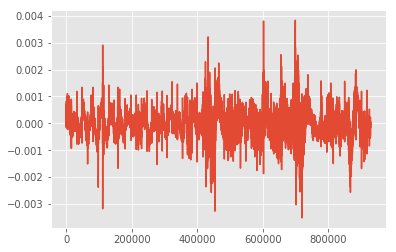

In [15]:
plt.plot(data, '-', );

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


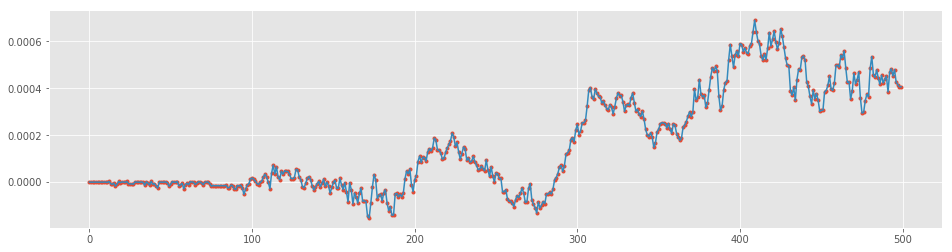

In [16]:
# Looking at first 500 frames

plt.figure(figsize=(16, 4))
plt.plot(data[:500], '.'); plt.plot(data[:500], '-');

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


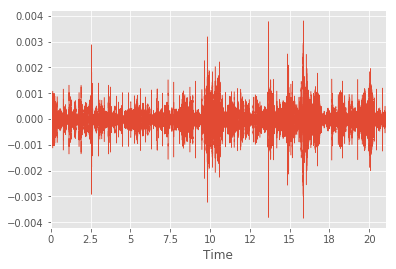

In [17]:
librosa.display.waveplot(data, sr=sr)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


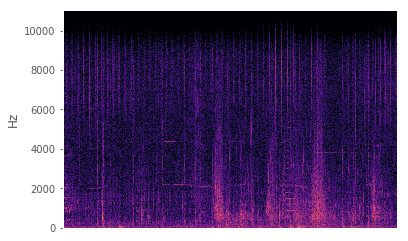

In [18]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
librosa.display.specshow(D, y_axis='linear')  # Compute linear-based spectrogram

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


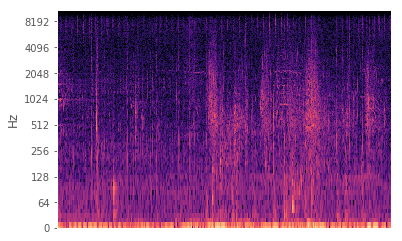

In [19]:
librosa.display.specshow(D, y_axis='log') # Compute log-based spectrogram

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


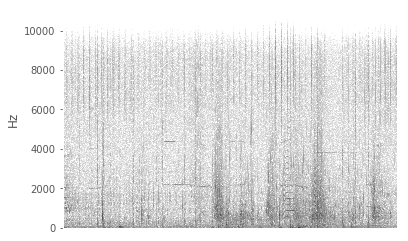

In [20]:
librosa.display.specshow(D, cmap='gray_r', y_axis='linear') # Compute linear-based spectrogram with greyscale colormap

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


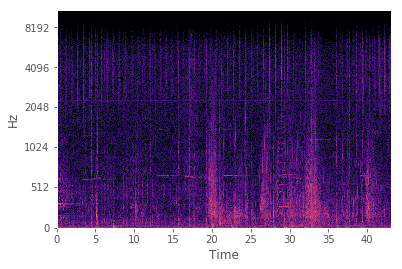

In [21]:
# Spectrogram with STFT
D = np.abs(librosa.stft(data, n_fft=2048, win_length=2000, hop_length=500))
librosa.display.specshow(librosa.amplitude_to_db(D, ref = np.max),y_axis='mel', x_axis='time')

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0 to DejaVu Sans ('/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


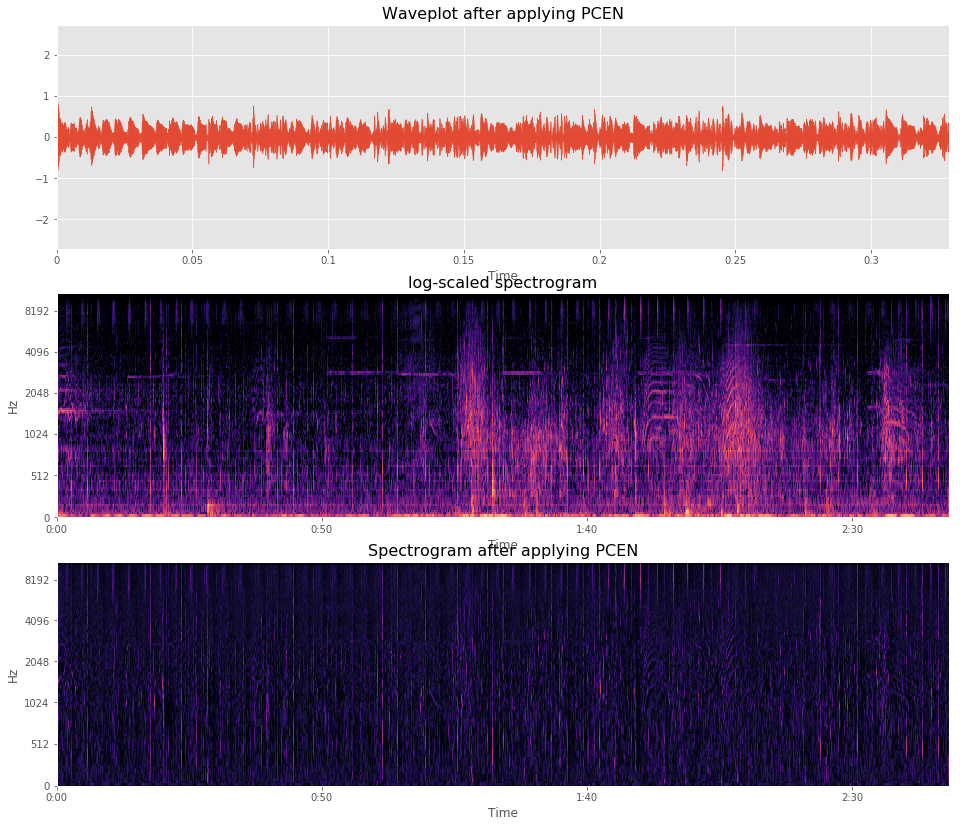

In [22]:
# Applying PCEN

S = librosa.feature.melspectrogram(data, sr=sr, power=1, n_fft=1024, hop_length=128) # Compute mel-scaled spectrogram
log_S = librosa.amplitude_to_db(S, ref=np.max) #Convert an amplitude spectrogram to dB-scaled spectrogram
pcen_S = librosa.core.pcen(S) #Compute Per-Channel Energy Normalization
plt.figure(figsize=(16, 14))
plt.subplot(3,1,1)
plt.title('Waveplot after applying PCEN', fontsize=16)
librosa.display.waveplot(pcen_S)
plt.subplot(3,1,2)
plt.title('log-scaled spectrogram', fontsize=16)
librosa.display.specshow(log_S, x_axis='time', y_axis='mel')
plt.subplot(3,1,3)
plt.title('Spectrogram after applying PCEN', fontsize=16)
librosa.display.specshow(pcen_S, x_axis='time', y_axis='mel')

In [0]:
def padding(data, input_length):
    '''Padding of samples to make them of same length'''
    if len(data) > input_length:
        max_offset = len(data) - input_length
        offset = np.random.randint(max_offset)
        data = data[offset:(input_length + offset)]
    else:
        if input_length > len(data):
            max_offset = input_length - len(data)
            offset = np.random.randint(max_offset)
        else:
            offset = 0
        data = np.pad(data, (offset, input_length - len(data) - offset), "constant")
    return data

In [0]:
def audio_norm(data):
    '''Normalization of audio'''
    max_data = np.max(data)
    min_data = np.min(data)
    data = (data - min_data) / (max_data - min_data + 1e-6)
    return data - 0.5


def mfcc(data, sampling_rate, n_mfcc):
    '''Compute mel-scaled feature using librosa'''
    data = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
    # data = np.expand_dims(data, axis=-1)
    return data

In [0]:
def apply_per_channel_energy_norm(data, sampling_rate):
    '''Compute Per-Channel Energy Normalization (PCEN)'''
    S = librosa.feature.melspectrogram(
        data, sr=sampling_rate, power=1)  # Compute mel-scaled spectrogram
    # Convert an amplitude spectrogram to dB-scaled spectrogram
    log_S = librosa.amplitude_to_db(S, ref=np.max)
    pcen_S = librosa.core.pcen(S)
    return pcen_S

In [0]:
def wavelet_denoising(data):
    '''
    Wavelet Denoising using scikit-image
    NOTE: Wavelet denoising is an effective method for SNR improvement in environments with
              wide range of noise types competing for the same subspace.
    '''
    sigma_est = estimate_sigma(data, multichannel=True, average_sigmas=True)
    im_bayes = denoise_wavelet(data, multichannel=False, convert2ycbcr=True, method='BayesShrink',
                               mode='soft')
    im_visushrink = denoise_wavelet(data, multichannel=False, convert2ycbcr=True, method='VisuShrink',
                                    mode='soft')

    # VisuShrink is designed to eliminate noise with high probability, but this
    # results in a visually over-smooth appearance. Here, we specify a reduction
    # in the threshold by factors of 2 and 4.
    im_visushrink2 = denoise_wavelet(data, multichannel=False, convert2ycbcr=True, method='VisuShrink',
                                     mode='soft', sigma=sigma_est / 2)
    im_visushrink4 = denoise_wavelet(data, multichannel=False, convert2ycbcr=True, method='VisuShrink',
                                     mode='soft', sigma=sigma_est / 4)
    return im_bayes

In [0]:
def set_rate(audio, rate):
    '''Set sampling rate'''
    return audio.set_frame_rate(rate)


def make_chunks(filename, chunk_size, sampling_rate, target_location):
    '''Divide the audio file into chunk_size samples'''
    f = AudioSegment.from_wav(filename)

    if f.frame_rate != sampling_rate:
        f = set_rate(f, sampling_rate)

    j = 0

    if not os.path.exists(target_location):
        os.makedirs(target_location)

    os.chdir(target_location)

    f_name = os.path.basename(filename)

    while len(f[:]) >= chunk_size * 1000:
        chunk = f[:chunk_size * 1000]
        chunk.export(f_name[:-4] + "_{:04d}.wav".format(j), format="wav")
        logger.info("Padded file stored as " + f_name[:-4] + "_{:04d}.wav".format(j))
        f = f[chunk_size * 1000:]
        j += 1

    if 0 < len(f[:]) and len(f[:]) < chunk_size * 1000:
        silent = AudioSegment.silent(duration=chunk_size * 1000)
        paddedData = silent.overlay(f, position=0, times=1)
        paddedData.export(f_name[:-4] + "_{:04d}.wav".format(j), format="wav")
        logger.info("Padded file stored as " + f_name[:-4] + "_{:04d}.wav".format(j))

In [0]:
def plot_and_save(denoised_data, f_name):

    fig, ax = plt.subplots()

    i = 0
    # Add this line to show plots else ignore warnings
    # plt.ion()

    ax.imshow(denoised_data)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    fig.set_size_inches(10, 10)
    fig.savefig(
        f"{f_name[:-4]}" + "_{:04d}.png".format(i),
        dpi=80,
        bbox_inches="tight",
        quality=95,
        pad_inches=0.0)

    fig.canvas.draw()
    fig.canvas.flush_events()
    i += 1


In [0]:
def standardize_and_plot(sampling_rate, file_path_image):
    logger.info(f"All files will be resampled to {sampling_rate}Hz")

    output_image_folder = "PreProcessed_image/"

    for dirs, subdirs, files in os.walk(file_path_image):
        for i, file in enumerate(files):
            if file.endswith(('.wav', '.WAV')):
                logger.info(f"Pre-Processing file: {file}")
                data, sr = librosa.core.load(
                    os.path.join(dirs, file), sr=sampling_rate, res_type='kaiser_fast')
                target_path = os.path.join(output_image_folder, dirs)

                # There is no need to apply padding since all samples are of same length
                # padded_data = padding(data, input_length)

                # TODO: mismatch of shape
                # if use_mfcc:
                #     mfcc_data = mfcc(padded_data, sampling_rate, n_mfcc)
                # else:
                #     mfcc_data = preprocessing_fn(padded_data)[:, np.newaxis]

                pcen_S = apply_per_channel_energy_norm(data, sr)

                denoised_data = wavelet_denoising(pcen_S)

                work_dir = os.getcwd()

                if not os.path.exists(target_path):
                    os.makedirs(target_path)

                os.chdir(target_path)

                f_name = os.path.basename(file)

                plot_and_save(denoised_data, f_name)

                os.chdir(work_dir)

In [0]:
# !ls

In [0]:
# cd ..

In [0]:
!rm -rf PreProcessed_image

In case the following code stops anywhere, please delete the PreProcessed_audio folder and then proceed.

In [32]:
chunkSize = 4
sampling_rate = 44100
file_path_audio = 'Field Recordings NGOS'
# audio_duration = 
use_mfcc = False
n_mfcc = 20

no_of_files = len(os.listdir('.'))

output_audio_folder = "PreProcessed_audio/"

# Traverse all files inside each sub-folder and make chunks of audio file
for dirs, subdirs, files in os.walk(file_path_audio):
    for file in files:
        if file.endswith(('.wav', '.WAV')):
            logger.info(f"Making chunks of size {chunkSize}s of file: {file}")

            input_file = os.path.join(dirs, file)

            work_dir = os.getcwd()

            output_path = os.path.join(output_audio_folder, dirs)

            '''
            CouldntDecodeError: Decoding failed. ffmpeg returned error
            code: 1 in file ._20180605_0645_AD8.wav 2018, so catching exception
            '''
            try:
                make_chunks(
                    input_file,
                    chunkSize,
                    sampling_rate,
                    output_path)
            except Exception as e:
                logger.error(f"Exception: {e}", exc_info=True)
                pass

            os.chdir(work_dir)

INFO:__main__:Making chunks of size 4s of file: 1002.WAV
INFO:__main__:Padded file stored as 1002_0000.wav
INFO:__main__:Padded file stored as 1002_0001.wav
INFO:__main__:Padded file stored as 1002_0002.wav
INFO:__main__:Padded file stored as 1002_0003.wav
INFO:__main__:Padded file stored as 1002_0004.wav
INFO:__main__:Padded file stored as 1002_0005.wav
INFO:__main__:Padded file stored as 1002_0006.wav
INFO:__main__:Padded file stored as 1002_0007.wav
INFO:__main__:Padded file stored as 1002_0008.wav
INFO:__main__:Padded file stored as 1002_0009.wav
INFO:__main__:Padded file stored as 1002_0010.wav
INFO:__main__:Padded file stored as 1002_0011.wav
INFO:__main__:Padded file stored as 1002_0012.wav
INFO:__main__:Padded file stored as 1002_0013.wav
INFO:__main__:Padded file stored as 1002_0014.wav
INFO:__main__:Padded file stored as 1002_0015.wav
INFO:__main__:Padded file stored as 1002_0016.wav
INFO:__main__:Padded file stored as 1002_0017.wav
INFO:__main__:Padded file stored as 1002_00

In [ ]:
file_path_image = os.path.join(output_audio_folder, file_path_audio)

logger.info(f"Starting to load {no_of_files} data files in the directory")

standardize_and_plot(sampling_rate, file_path_image)
